In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123456)
from scipy import linalg as la

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
* What percent of the total variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [2]:
#N
N=2000

#x1 distributed as N(0,1)
x1 = np.random.normal(0,1,N)
#x2 distributed as x1+N(0,3)
x2 = x1+np.random.normal(0,3,N)
#x3 distributed ad 2x1+x2
x3 = 2*x1+x2

In [3]:
#matrix of the dataset
matrix_3D=np.vstack((x1,x2,x3))
print('Matrix of the dataset:','\n',matrix_3D,'\n')
#covariance matrix
matrix_cov=np.cov(matrix_3D)
print('Covariance matrix:','\n',matrix_cov,'\n')

Matrix of the dataset: 
 [[ 4.69112300e-01 -2.82863344e-01 -1.50905850e+00 ...  1.98767831e-01
   1.75755504e+00 -1.11568023e+00]
 [ 6.45265791e+00  7.57606795e-01 -4.44855874e-01 ...  3.90370081e-04
   1.24184686e+00 -4.41323318e+00]
 [ 7.39088251e+00  1.91880107e-01 -3.46297288e+00 ...  3.97926032e-01
   4.75695694e+00 -6.64459364e+00]] 

Covariance matrix: 
 [[ 1.04602755  1.03483111  3.12688621]
 [ 1.03483111 10.25439241 12.32405463]
 [ 3.12688621 12.32405463 18.57782706]] 



In [4]:
#eigenvectors and eigenvalues
l, V = la.eig(matrix_cov)
print('Eigenvalues:','\n',l,'\n')
print('Eigenvectors:','\n',V)

Eigenvalues: 
 [2.77938659e+01+0.j 6.17966025e-16+0.j 2.08438112e+00+0.j] 

Eigenvectors: 
 [[-0.11688304 -0.81649658  0.56539516]
 [-0.57558179 -0.40824829 -0.70854706]
 [-0.80934786  0.40824829  0.42224326]]


In [5]:
#eigenvectors and eigenvalues using SVD
U, spectrum, Vt = la.svd(matrix_3D)
l_svd=spectrum**2/(N-1)
V_svd=U
print('Eigenvalues:','\n',l_svd,'\n')
print('Eigenvectors:','\n',V_svd)

Eigenvalues: 
 [2.77942341e+01 2.08547933e+00 2.05875994e-31] 

Eigenvectors: 
 [[-0.11686905  0.56539805 -0.81649658]
 [-0.57559931 -0.70853283 -0.40824829]
 [-0.80933742  0.42226328  0.40824829]]


In [6]:
#variability
Lambda=np.diag(l_svd)
print('Lambda: ','\n',Lambda,'\n')
print('Trace:','\n', np.trace(Lambda),'\n')
var=[]
for i in range(3):
    var.append(Lambda[i,i]/np.trace(Lambda))
print('Variability of the principal components: ','\n', var,'\n' )
print('Total variability of the principal components: ','\n', sum(var),'\n' )
print('Taking the two first principal components total variability: ','\n',(var[0]+var[1])/sum(var))

Lambda:  
 [[2.77942341e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.08547933e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.05875994e-31]] 

Trace: 
 29.879713443366818 

Variability of the principal components:  
 [0.9302041722554893, 0.06979582774451068, 6.890159591922118e-33] 

Total variability of the principal components:  
 1.0 

Taking the two first principal components total variability:  
 1.0


In [7]:
#rotation
matrix_3Dp=np.dot(V_svd.T, matrix_3D)
matrix_3Dp

array([[-9.75068793e+00, -5.58315729e-01,  3.23513451e+00, ...,
        -3.45510933e-01, -4.77019324e+00,  8.04836074e+00],
       [-1.18578648e+00, -6.15695745e-01, -2.00031003e+00, ...,
         2.80135906e-01,  2.12251717e+00, -3.09650749e-01],
       [ 4.29403645e-16, -1.12375670e-16, -1.02661294e-15, ...,
         1.11561541e-16,  1.05435187e-15, -9.96361405e-16]])

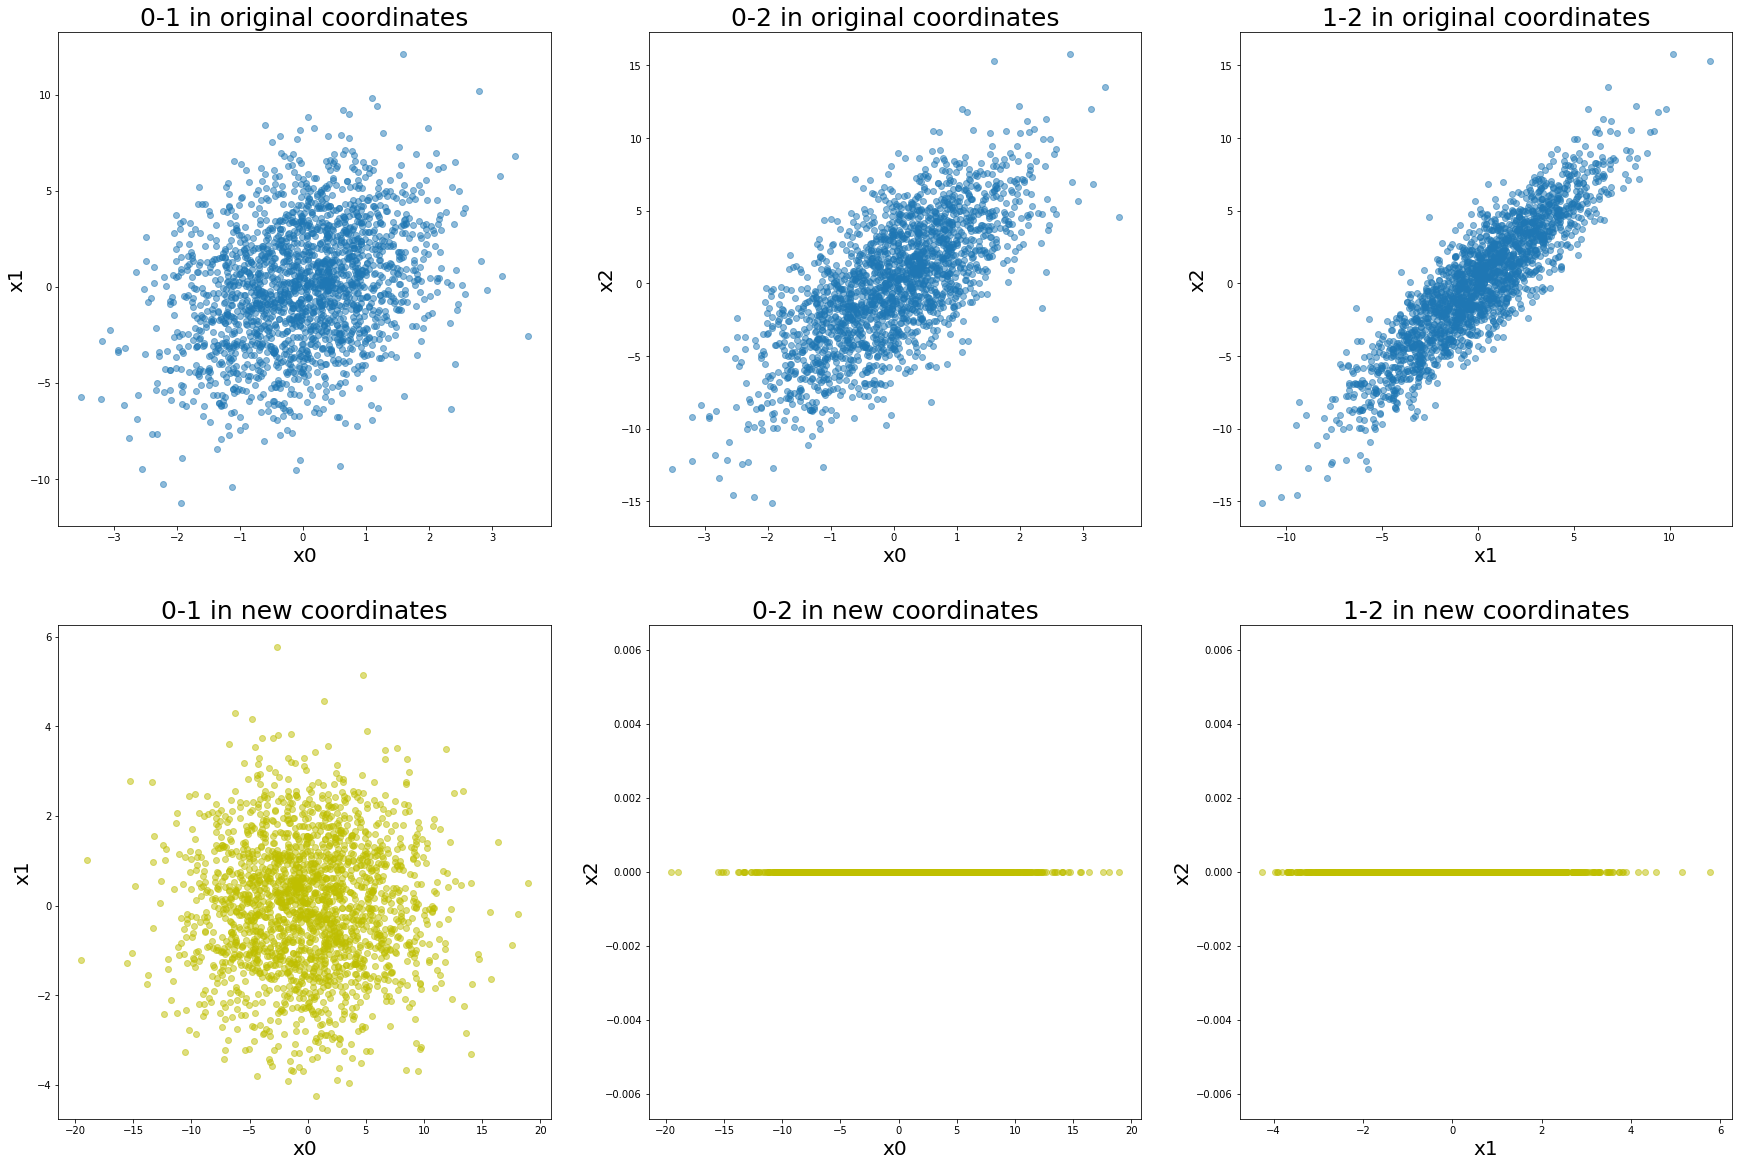

In [8]:
fig,((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(30, 20))
ax1.scatter(x1,x2, alpha=0.5)
ax1.set_title('0-1 in original coordinates', size=25)
ax1.set_xlabel('x0', size=20)
ax1.set_ylabel('x1', size=20)
ax2.scatter(x1,x3, alpha=0.5)
ax2.set_title('0-2 in original coordinates', size=25)
ax2.set_xlabel('x0', size=20)
ax2.set_ylabel('x2', size=20)
ax3.scatter(x2,x3, alpha=0.5)
ax3.set_title('1-2 in original coordinates', size=25)
ax3.set_xlabel('x1', size=20)
ax3.set_ylabel('x2', size=20)
ax4.scatter(matrix_3Dp[0,:],matrix_3Dp[1,:], alpha=0.5, c='y')
ax4.set_title('0-1 in new coordinates', size=25)
ax4.set_xlabel('x0', size=20)
ax4.set_ylabel('x1', size=20)
ax5.scatter(matrix_3Dp[0,:],matrix_3Dp[2,:], alpha=0.5, c='y')
ax5.set_title('0-2 in new coordinates', size=25)
ax5.set_xlabel('x0', size=20)
ax5.set_ylabel('x2', size=20)
ax6.scatter(matrix_3Dp[1,:],matrix_3Dp[2,:], alpha=0.5, c='y')
ax6.set_title('1-2 in new coordinates', size=25)
ax6.set_xlabel('x1', size=20)
ax6.set_ylabel('x2', size=20);

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [9]:
#noise
n0=np.random.normal(0,1/50,N)
n1=np.random.normal(0,1/50,N)
n2=np.random.normal(0,1/50,N)
n3=np.random.normal(0,1/50,N)
n4=np.random.normal(0,1/50,N)
n5=np.random.normal(0,1/50,N)
n6=np.random.normal(0,1/50,N)
n7=np.random.normal(0,1/50,N)
n8=np.random.normal(0,1/50,N)
n9=np.random.normal(0,1/50,N)

In [10]:
#matrix of the dataset
matrix_nD=np.vstack((x1,x2,x3,n0,n1,n1,n2,n3,n4,n5,n6,n7,n8,n9))
print('Matrix of the dataset:','\n',matrix_nD,'\n')
#covariance matrix
matrix_cov_n=np.cov(matrix_nD)
print('Covariance matrix:','\n',matrix_cov_n,'\n')

Matrix of the dataset: 
 [[ 4.69112300e-01 -2.82863344e-01 -1.50905850e+00 ...  1.98767831e-01
   1.75755504e+00 -1.11568023e+00]
 [ 6.45265791e+00  7.57606795e-01 -4.44855874e-01 ...  3.90370081e-04
   1.24184686e+00 -4.41323318e+00]
 [ 7.39088251e+00  1.91880107e-01 -3.46297288e+00 ...  3.97926032e-01
   4.75695694e+00 -6.64459364e+00]
 ...
 [ 2.88103733e-03 -6.89143495e-03  4.91615479e-03 ... -1.73279797e-02
   3.40290660e-02 -9.27597691e-03]
 [ 1.55050877e-02  4.18965857e-02  4.30595478e-03 ...  2.44621119e-02
   2.86506239e-02 -9.08158958e-03]
 [-1.75011008e-02 -4.15923614e-02  2.49526755e-02 ... -2.69243517e-04
  -1.64263360e-02  2.94917681e-02]] 

Covariance matrix: 
 [[ 1.04602755e+00  1.03483111e+00  3.12688621e+00 -4.35978942e-04
   3.38592697e-04  3.38592697e-04  2.97975173e-06 -4.23083029e-04
  -9.26746370e-04  3.13356407e-04  9.73851992e-04  6.46434697e-04
  -6.79818154e-04  6.65056377e-04]
 [ 1.03483111e+00  1.02543924e+01  1.23240546e+01 -1.18862352e-03
   3.44999534e-03

In [11]:
#eigenvectors and eigenvalues
l, V = la.eig(matrix_cov_n)
print('Eigenvalues:','\n',l,'\n')
print('Eigenvectors:','\n',V)

Eigenvalues: 
 [2.77938707e+01+0.j 2.08438438e+00+0.j 8.18938623e-04+0.j
 4.57748710e-04+0.j 4.48185418e-04+0.j 4.21259123e-04+0.j
 4.02595245e-04+0.j 3.97300530e-04+0.j 3.86933212e-04+0.j
 3.64520015e-04+0.j 3.67731667e-04+0.j 3.73027842e-04+0.j
 7.44600637e-16+0.j 3.60631023e-20+0.j] 

Eigenvectors: 
 [[ 1.16883027e-01  5.65394722e-01 -1.85964297e-04 -4.52531250e-04
  -2.14837065e-04 -1.34135230e-04  8.36170504e-05  2.86228581e-04
   1.38633924e-04  1.59871018e-04 -2.28364239e-04  1.00833498e-04
   8.16496581e-01 -9.49351571e-10]
 [ 5.75581738e-01 -7.08546494e-01  4.23947342e-04  5.60307577e-04
   2.85188251e-04  1.24964042e-04  1.21538502e-05 -2.94813023e-04
  -1.03271054e-04 -3.47789399e-04  2.17966020e-04 -7.33667207e-05
   4.08248290e-01 -4.74675785e-10]
 [ 8.09347792e-01  4.22242950e-01  5.20187473e-05 -3.44754922e-04
  -1.44485880e-04 -1.43306419e-04  1.79387951e-04  2.77644139e-04
   1.73996795e-04 -2.80473626e-05 -2.38762458e-04  1.28300275e-04
  -4.08248290e-01  4.74675786e-

In [12]:
#eigenvectors and eigenvalues using SVD
U, spectrum, Vt = la.svd(matrix_nD)
l_svd=spectrum**2/(N-1)
V_svd=U
print('Eigenvalues:','\n',l_svd,'\n')
print('Eigenvectors:','\n',V_svd)

Eigenvalues: 
 [2.77942389e+01 2.08548259e+00 8.19014392e-04 4.57753819e-04
 4.48189920e-04 4.21426961e-04 4.02595467e-04 3.97310170e-04
 3.87100182e-04 3.73222324e-04 3.67756769e-04 3.64566642e-04
 2.04788384e-31 5.80793737e-36] 

Eigenvectors: 
 [[-1.16869042e-01  5.65397613e-01 -1.83507316e-04 -4.51808891e-04
   2.15613652e-04 -1.29520761e-04  8.38771287e-05 -2.87222292e-04
   1.32590304e-04 -1.11365275e-04  2.30605908e-04  1.58771287e-04
   8.16492997e-01  2.41905506e-03]
 [-5.75599263e-01 -7.08532258e-01  4.20706075e-04  5.59297664e-04
  -2.86261989e-04  1.18795133e-04  1.18271431e-05  2.96316813e-04
  -9.57022791e-05  8.66620513e-05 -2.22891619e-04 -3.47552300e-04
   4.08246499e-01  1.20952753e-03]
 [-8.09337347e-01  4.22262969e-01  5.36914428e-05 -3.44320117e-04
   1.44965315e-04 -1.40246389e-04  1.79581400e-04 -2.78127770e-04
   1.69478328e-04 -1.36068500e-04  2.38320198e-04 -3.00097257e-05
  -4.08246499e-01 -1.20952753e-03]
 [ 8.64834245e-05 -1.30895962e-04  1.85876346e-02 -1.

In [13]:
#variability
Lambda=np.diag(l_svd)
print('Lambda: ','\n',Lambda,'\n')
print('Trace:','\n', np.trace(Lambda),'\n')
var=[]
for i in range(13):
    var.append(Lambda[i,i]/np.trace(Lambda))
print('Variability of the principal components: ','\n', var,'\n' )
print('Total variability of the principal components: ','\n', sum(var),'\n' )
print('Taking the two first principal components total variability: ','\n',(var[0]+var[1])/sum(var))

Lambda:  
 [[2.77942389e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.08548259e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.19014392e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.57753819e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  4.48189920e-04 0.00000000e+00 0.00000000e+00 0.00

In [14]:
matrix_nDp=np.dot(V_svd.T, matrix_nD)
matrix_nDp

array([[-9.75069105e+00, -5.58307867e-01,  3.23513815e+00, ...,
        -3.45504401e-01, -4.77019063e+00,  8.04836811e+00],
       [-1.18581889e+00, -6.15706526e-01, -2.00033077e+00, ...,
         2.80142119e-01,  2.12252152e+00, -3.09634818e-01],
       [-4.53244229e-02, -1.00370506e-02,  1.37535770e-02, ...,
        -1.19694070e-02, -9.47758280e-03,  2.81721563e-02],
       ...,
       [-3.64975349e-02,  8.05513364e-03, -1.76629192e-02, ...,
        -1.27498923e-02, -1.89404395e-02, -8.17705128e-03],
       [ 1.33226763e-15,  4.44089210e-16,  6.10622664e-16, ...,
        -9.55724215e-17, -5.55111512e-16, -4.44089210e-16],
       [ 2.08166817e-17, -1.73472348e-17,  6.93889390e-18, ...,
         8.67361738e-19, -5.20417043e-18,  6.93889390e-18]])

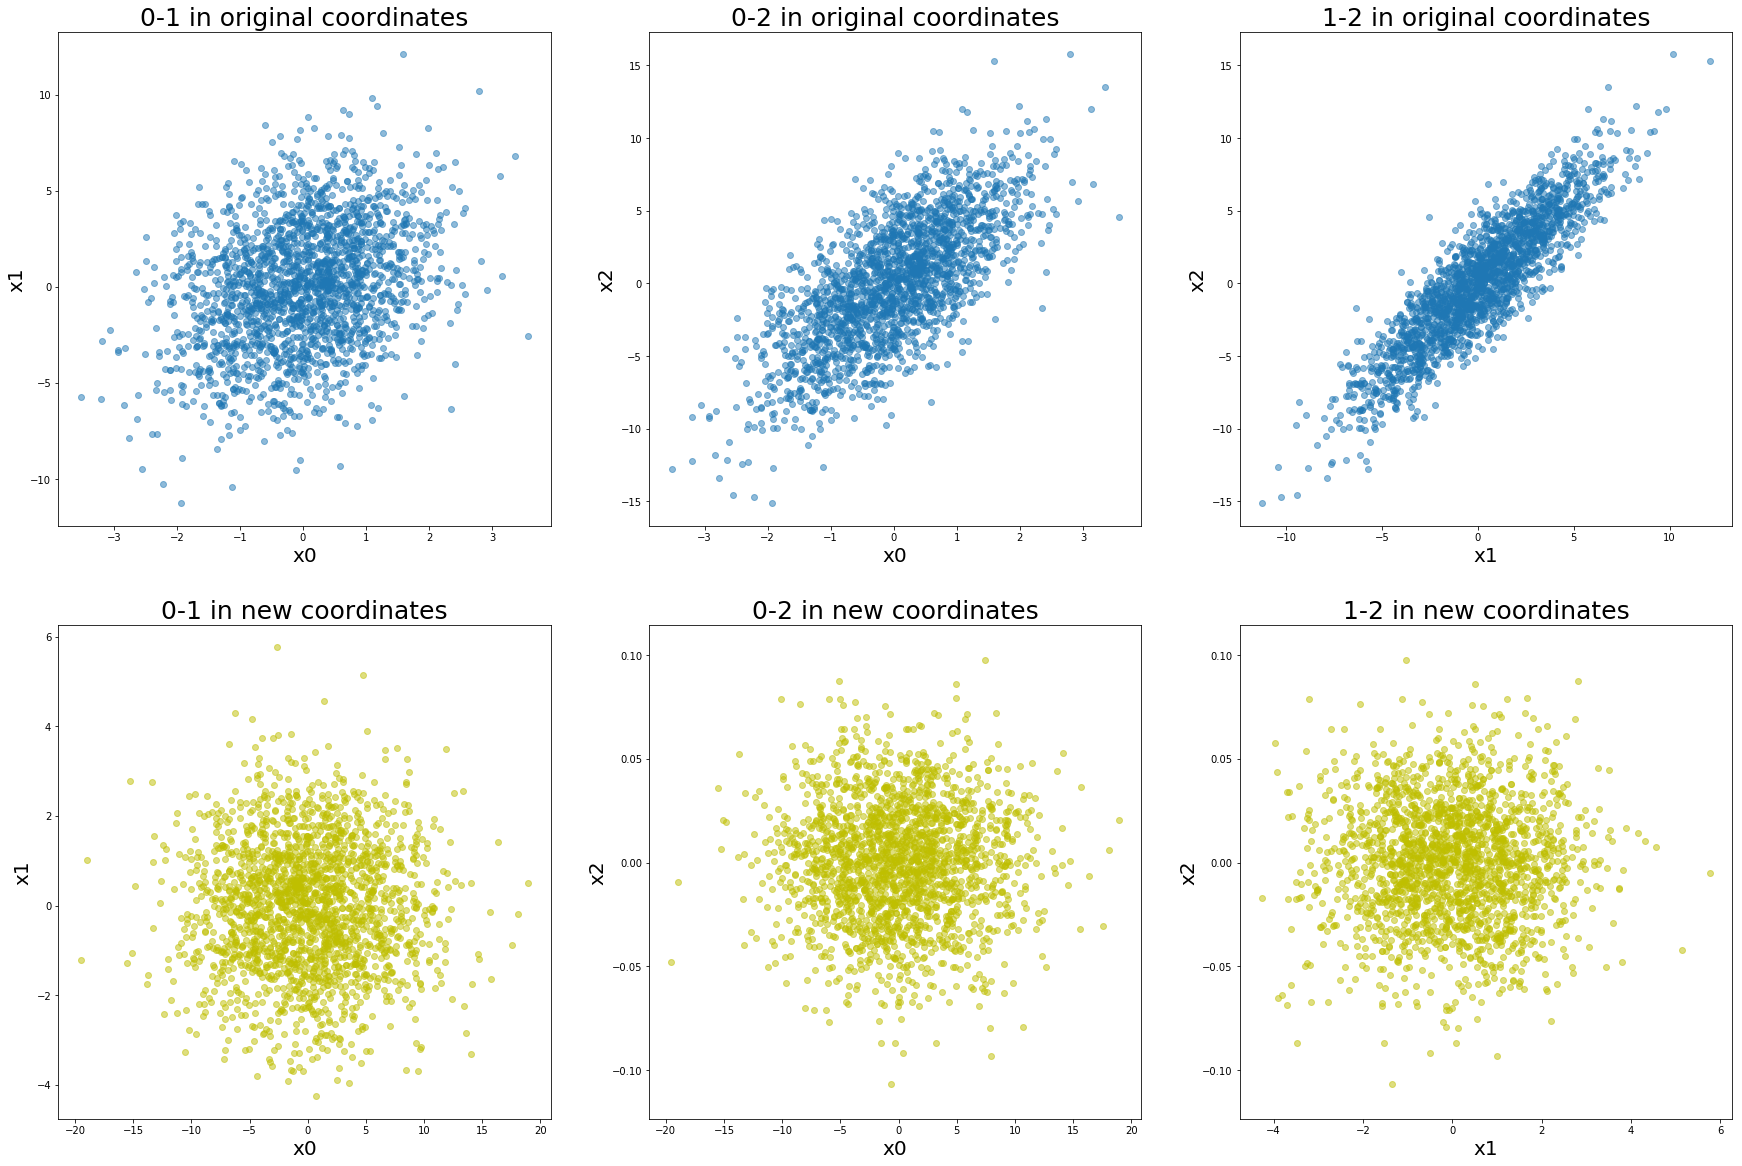

In [15]:
fig1,((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(30, 20))
ax1.scatter(x1,x2, alpha=0.5)
ax1.set_title('0-1 in original coordinates', size=25)
ax1.set_xlabel('x0', size=20)
ax1.set_ylabel('x1', size=20)
ax2.scatter(x1,x3, alpha=0.5)
ax2.set_title('0-2 in original coordinates', size=25)
ax2.set_xlabel('x0', size=20)
ax2.set_ylabel('x2', size=20)
ax3.scatter(x2,x3, alpha=0.5)
ax3.set_title('1-2 in original coordinates', size=25)
ax3.set_xlabel('x1', size=20)
ax3.set_ylabel('x2', size=20)
ax4.scatter(matrix_nDp[0,:],matrix_nDp[1,:], alpha=0.5, c='y')
ax4.set_title('0-1 in new coordinates', size=25)
ax4.set_xlabel('x0', size=20)
ax4.set_ylabel('x1', size=20)
ax5.scatter(matrix_nDp[0,:],matrix_nDp[2,:], alpha=0.5, c='y')
ax5.set_title('0-2 in new coordinates', size=25)
ax5.set_xlabel('x0', size=20)
ax5.set_ylabel('x2', size=20)
ax6.scatter(matrix_nDp[1,:],matrix_nDp[2,:], alpha=0.5, c='y')
ax6.set_title('1-2 in new coordinates', size=25)
ax6.set_xlabel('x1', size=20)
ax6.set_ylabel('x2', size=20);

By introducing the noise it is possible to observe, as expected, a difference between the results. Observing the graphs obtained after the PCA, it is possible to see a similarity in the points behaviour in the first graph ((0,1) projection) with and without noise, while it is different the behaviour of the points in the last two graphs((0,2) and (1,2) projections). Without noise it is possible to observe that the points are arranged along the X axis, while, with noise the points are normally distributed.

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset